In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/andrei_c/projects/ds_env/from-scratch/src')

from Bifrost import Bifrost
from Heimdall import batch_gradient_descent as bgd, \
                     mini_batch_gradient_descent as mbgd, \
                     stochastic_gradient_descent as sgd
from Heisenberg import mean_squared_error, root_mean_squared_error

In [2]:
sample = pd.read_csv('../data/reg-data.csv')
sample = sample[['Temperatura Media (C)', 
                 'Precipitacao (mm)', 
                 'Final de Semana',
                 'Consumo de cerveja (litros)']].to_numpy()

X = sample[:, :3]
y = sample[:, -1:]

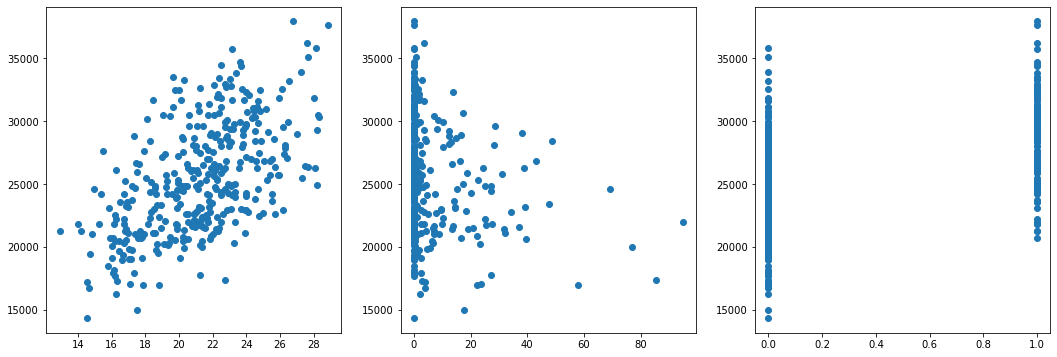

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].scatter(X[:, 0], y)
ax[1].scatter(X[:, 1], y)
ax[2].scatter(X[:, 2], y);

100%|██████████| 200/200 [00:00<00:00, 18770.66it/s]


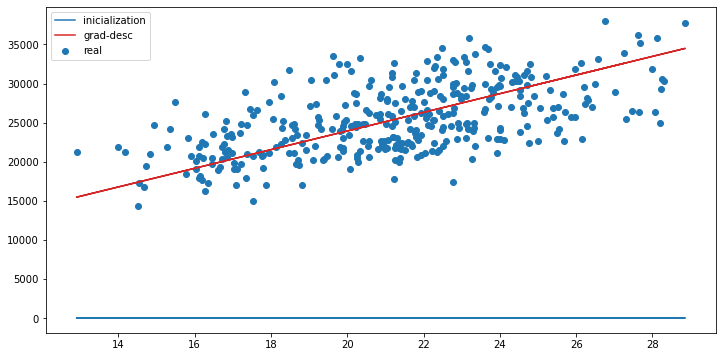

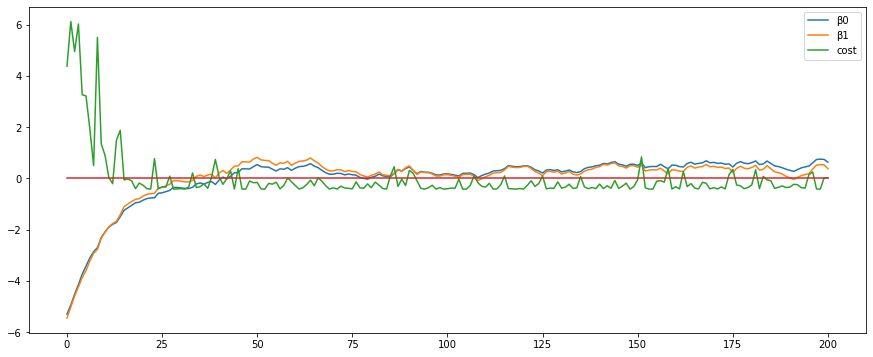

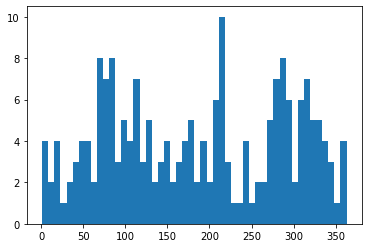

100%|██████████| 200/200 [00:00<00:00, 4366.25it/s]


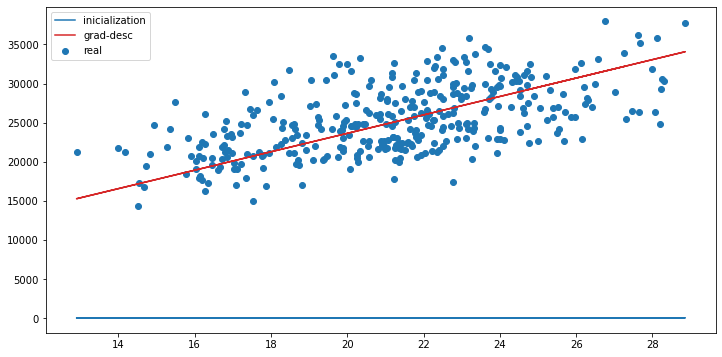

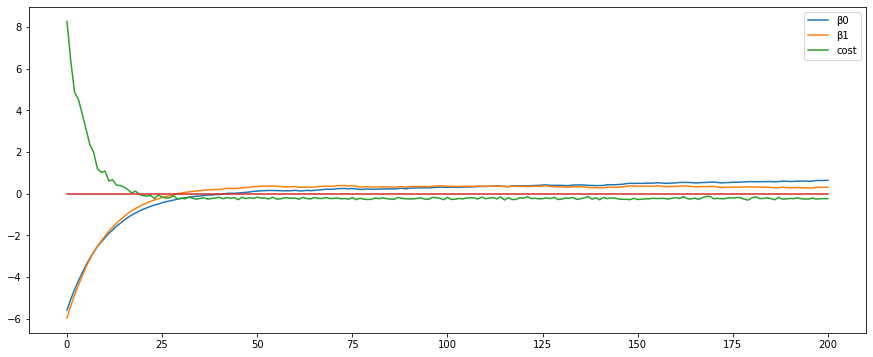

100%|██████████| 200/200 [00:00<00:00, 1130.15it/s]


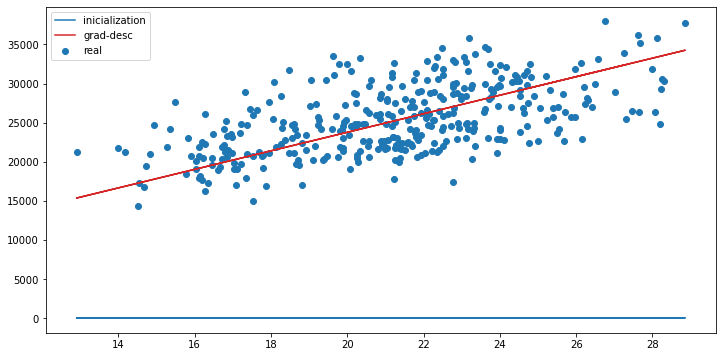

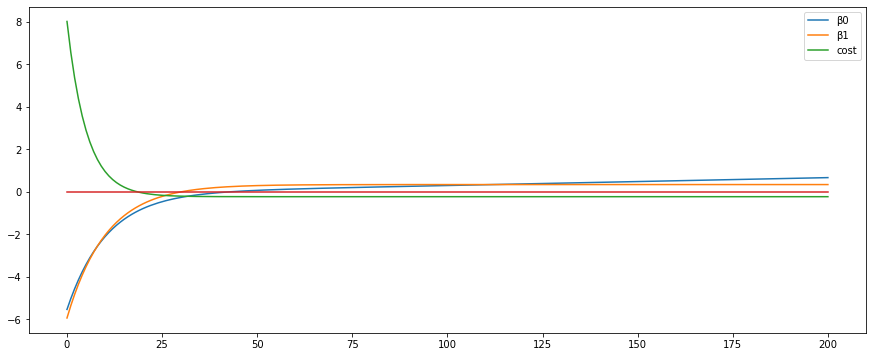

In [11]:
X_train, y_train = X[:, :1], y
n_variables, initialization, lr, e = 1, 'random', 0.0001, 200

stochastic_gradient_regressor = Bifrost(n_variables, initialization=initialization)
stochastic_gradient_regressor.coefficients

coefficients, epochs = sgd(X_train, y_train, 
                           model=stochastic_gradient_regressor, 
                           coefficients=stochastic_gradient_regressor.coefficients, 
                           learning_rate=lr, 
                           epochs=e,
                           model_type={'regression': None},
                           plot_results=True)


mini_batch_gradient_regressor = Bifrost(n_variables, initialization=initialization)
mini_batch_gradient_regressor.coefficients

coefficients, epochs = mbgd(X_train, y_train, 
                            model=mini_batch_gradient_regressor, 
                            coefficients=mini_batch_gradient_regressor.coefficients, 
                            learning_rate=lr, 
                            epochs=e, 
                            batch_size=.1, 
                            plot_results=True)


batch_gradient_regressor = Bifrost(n_variables, initialization=initialization)
batch_gradient_regressor.coefficients

coefficients, epochs = bgd(X_train, y_train, 
                           model=batch_gradient_regressor, 
                           coefficients=batch_gradient_regressor.coefficients, 
                           learning_rate=lr, 
                           epochs=e, 
                           plot_results=True)

In [12]:
yhat_stochastic = stochastic_gradient_regressor.make_prediction(X_train)
yhat_mini_batch = mini_batch_gradient_regressor.make_prediction(X_train)
yhat_batch      = batch_gradient_regressor.make_prediction(X_train)

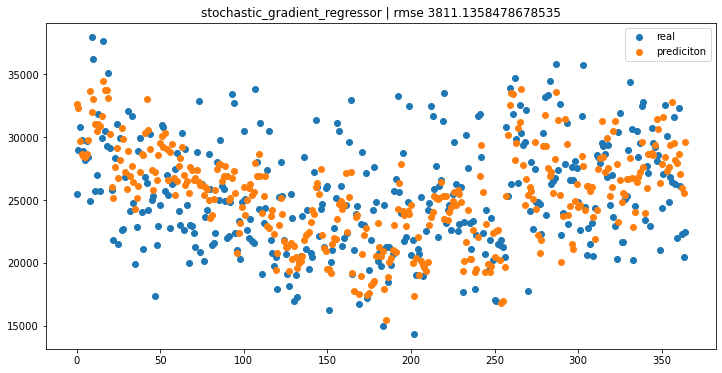

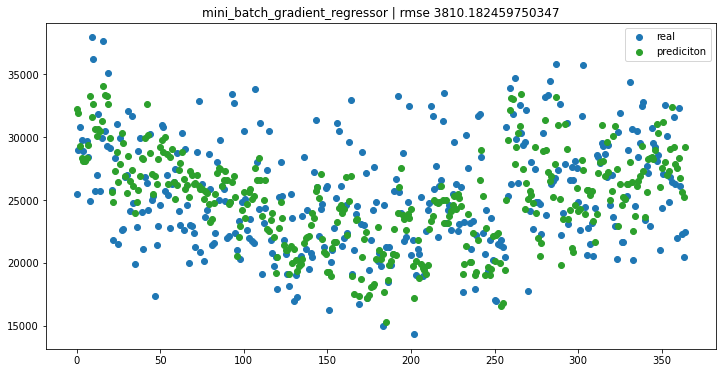

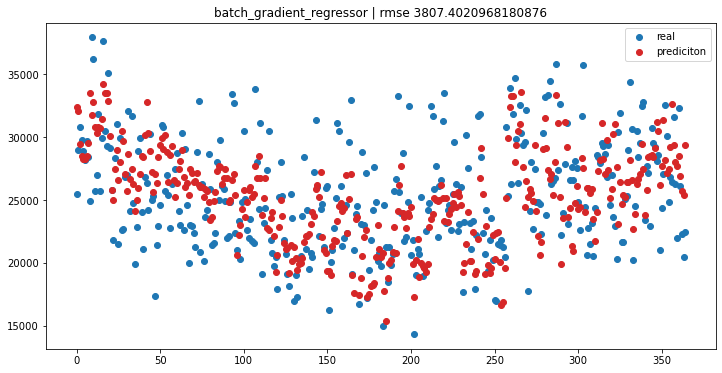

In [13]:
plt.figure(figsize=(12, 6))
plt.title(f'stochastic_gradient_regressor | rmse {root_mean_squared_error(np.squeeze(y_train), yhat_stochastic)}')
plt.scatter([i for i in range(len(y_train))], y_train, label='real')
plt.scatter([i for i in range(len(y_train))], yhat_stochastic, label='prediciton', c='C1')
plt.legend()
plt.show();

plt.figure(figsize=(12, 6))
plt.title(f'mini_batch_gradient_regressor | rmse {root_mean_squared_error(np.squeeze(y_train), yhat_mini_batch)}')
plt.scatter([i for i in range(len(y_train))], y_train, label='real')
plt.scatter([i for i in range(len(y_train))], yhat_mini_batch, label='prediciton', c='C2')
plt.legend()
plt.show();

plt.figure(figsize=(12, 6))
plt.title(f'batch_gradient_regressor | rmse {root_mean_squared_error(np.squeeze(y_train), yhat_batch)}')
plt.scatter([i for i in range(len(y_train))], y_train, label='real')
plt.scatter([i for i in range(len(y_train))], yhat_batch, label='prediciton', c='C3')
plt.legend()
plt.show();

In [ ]:
# X_lin = np.linspace(0, 1, num=200)[:, np.newaxis]
# y_lin = np.array([4 + 3*x + random.uniform(-1, 1) for x in X_lin])
# plt.scatter(X_lin[:, 0], y_lin);